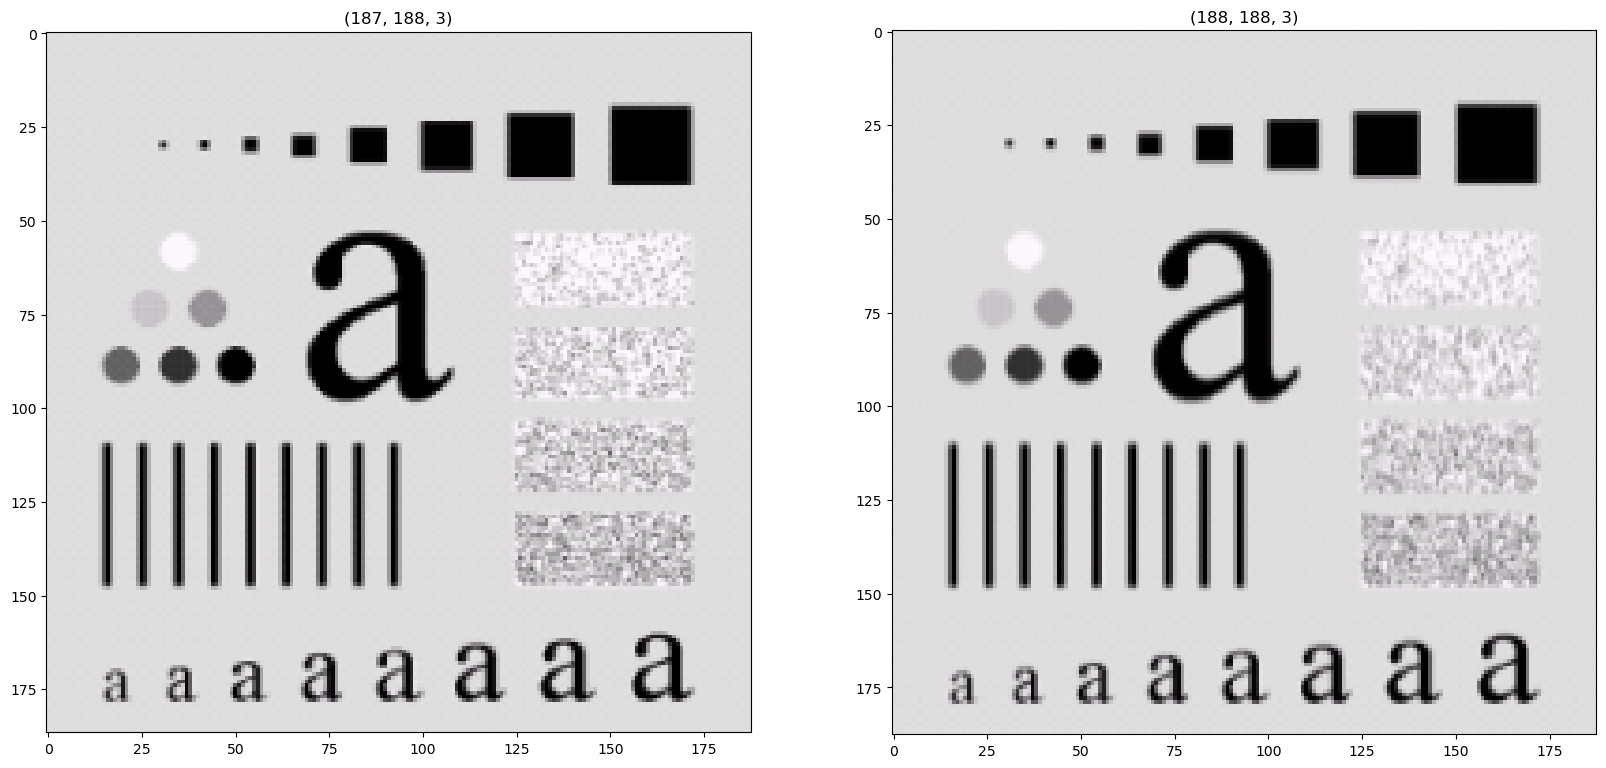

In [5]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns
from openpyxl import Workbook


image = Image.open("123.png")
image_array = np.array(image)

resized_image = cv2.resize(image_array, (int(188), int(188)))    #调整图像尺寸

_,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax1.set_title(image_array.shape)

ax2.imshow(resized_image,cmap = "gray")
ax2.set_title(resized_image.shape)


# 获取当前工作目录
current_directory = os.getcwd()

# 创建一个新的工作簿
workbook = Workbook()
sheet = workbook.active

# 将像素值写入 Excel 表格
# for y, row in enumerate(resized_image):
#     for x, pixel_value in enumerate(row):
#         sheet.cell(row=y + 1, column=x + 1, value=pixel_value)

image_array_color= np.array(resized_image)
height, width, channels = image_array_color.shape
# print(image_array_color)

# 将像素值写入 Excel 表格
for y in range(height):
    for x in range(width):        
        red, green, blue = image_array_color[y,x]        
        sheet.cell(row=y+ 1, column=x + 1, value=red)
        # sheet.cell(row=y * 3 + 1, column=x + 1, value=red)
        # sheet.cell(row=y * 3 + 2, column=x + 1, value=green)
        # sheet.cell(row=y * 3 + 3, column=x + 1, value=blue)

# 保存工作簿
output_path = os.path.join(current_directory, "output.xlsx")
workbook.save(output_path)
